In [1]:
import numpy as np
import minterpy as mp
from minterpy.extras.regression import *
from matplotlib import pyplot as plt

import torch
import torchvision
from torchvision import transforms, datasets
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from sklearn.neighbors import NearestNeighbors

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

from matplotlib.colors import Normalize

In [2]:
def getFashionMNIST(batch_size = 10):
    fashionmnist_data = torchvision.datasets.FashionMNIST(download=True, root = 'data/fashionmnist', transform = 
                                                                                 transforms.Compose([transforms.Resize(32),
                                                                                 transforms.ToTensor(), 
                                                                                 transforms.Lambda(lambda x: x.repeat(1, 1, 1))
                                                                                 ]))

    fashionmnist_data_test = torchvision.datasets.FashionMNIST(download=True, root = 'data/fashionmnist', train=False, transform = 
                                                                                 transforms.Compose([transforms.Resize(32),
                                                                                 transforms.ToTensor(), 
                                                                                 transforms.Lambda(lambda x: x.repeat(1, 1, 1))
                                                                                 ]))

    train_loader = torch.utils.data.DataLoader(fashionmnist_data,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              num_workers=16)

    test_loader = torch.utils.data.DataLoader(fashionmnist_data_test,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              num_workers=16)

    return train_loader, test_loader



def getDataset(dataset = "MNIST", batch_size = 10):
    if(dataset == "MNIST"):
        train_loader, test_loader = getMNIST(batch_size)
        noChannels,dx, dy = train_loader.dataset.__getitem__(1)[0].shape
    elif(dataset == "FashionMNIST"):
        train_loader, test_loader = getFashionMNIST(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
    elif(dataset == "Cifar10"):
        train_loader, test_loader = getCifar10(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
        """
    elif(dataset == "cityscapes"):
        train_loader, test_loader = getcityscapes(batch_size)
        noChannels, dx, dy = train_loader.dataset.__getitem__(1)[0].shape
        """
    else:
        return None, None, None, None, None    
        
    return train_loader, test_loader, noChannels, dx, dy

In [3]:
train_loader, test_loader, noChannels, dx, dy = getDataset("FashionMNIST", 60000)  # FashionMNIST , MNIST

/home/chethan/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
for inum, (batch_x, label) in enumerate(train_loader):
    break
    

In [5]:
orig = batch_x[5][0]

In [6]:
import numpy as np
import torch
import sys

import scipy
import scipy.integrate
#sys.path.insert(1, '/home/suarez08/PhD_PINNs/PIPS_framework')
from jmp_solver.sobolev import Sobolev
from jmp_solver.sobolev import Sobolev
from jmp_solver.solver import Solver
from jmp_solver.utils import matmul
import jmp_solver.surrogates
import time
#sys.path.insert(1, '/home/suarez08/minterpy/src')
import minterpy as mp
from jmp_solver.diffeomorphisms import hyper_rect
import matplotlib
import matplotlib.pyplot as plt
#style.use('dark_background')
matplotlib.rcdefaults() 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_dtype(torch.float64)

In [7]:
deg_quad = 9
#rect = rect = np.array([[-1.0, 1.0], [-1.0, 1.0]])
#diffeo_param = hyper_rect(*rect)
#sob_param = Sobolev(deg=deg_quad, dim=2)
##### Sobolev norm for the inteprolation
#sob_param.set_s(0)
#####
#x_plt, _, _, x, _, _ = sob_param.get_quad()
#metric_param = sob_param.metric()
#W_param = sob_param.get_leja_weights()
u_ob = jmp_solver.surrogates.Polynomial(n=deg_quad,p=np.inf, dim=2)
#metric_2d = sob_param.metric(weak=True)
#x_l = sob_param.get_xs()

In [8]:
x = np.linspace(-1,1,32)
b = np.linspace(-1,1,32)#np.array([x[0]])#np.linspace(-1,1,100)
xf= np.linspace(-1,1,32)#x#np.linspace(-1,1,100)
X_p = u_ob.data_axes([x,x]).T

In [9]:
#getting coefficients
Fr = torch.tensor(orig).reshape(32*32).double()
KsK = matmul(X_p.T, X_p)
Ksf = matmul(X_p.T, Fr)
w = matmul(KsK.inverse(), Ksf)

/tmp/ipykernel_25739/2701876868.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Fr = torch.tensor(orig).reshape(32*32).double()


In [10]:
test = matmul(X_p, w)
test[np.where(test < 0.0)] = 0


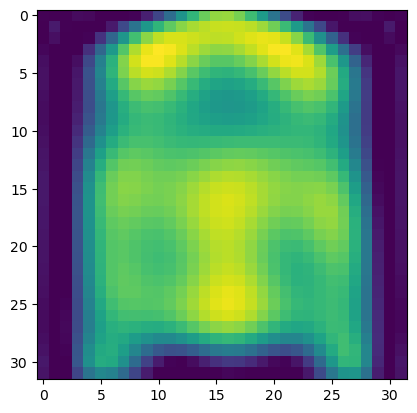

In [11]:
plt.imshow(test.reshape(32,32))

In [12]:
'''deg_quad = 20
rect = rect = np.array([[-1.0, 1.0], [-1.0, 1.0]])
diffeo_param = hyper_rect(*rect)
sob_param = Sobolev(deg=deg_quad, dim=2)
##### Sobolev norm for the inteprolation
sob_param.set_s(0)
#####
x_plt, _, _, x, _, _ = sob_param.get_quad()
metric_param = sob_param.metric()
W_param = sob_param.get_leja_weights()
u_ob = jmp_solver.surrogates.Polynomial(n=deg_quad,p=np.inf, dim=2)
metric_2d = sob_param.metric(weak=True)
x_l = sob_param.get_xs()
X_p = u_ob.data_axes([x,x]).T'''

'deg_quad = 20\nrect = rect = np.array([[-1.0, 1.0], [-1.0, 1.0]])\ndiffeo_param = hyper_rect(*rect)\nsob_param = Sobolev(deg=deg_quad, dim=2)\n##### Sobolev norm for the inteprolation\nsob_param.set_s(0)\n#####\nx_plt, _, _, x, _, _ = sob_param.get_quad()\nmetric_param = sob_param.metric()\nW_param = sob_param.get_leja_weights()\nu_ob = jmp_solver.surrogates.Polynomial(n=deg_quad,p=np.inf, dim=2)\nmetric_2d = sob_param.metric(weak=True)\nx_l = sob_param.get_xs()\nX_p = u_ob.data_axes([x,x]).T'

In [13]:
'''u_ob = jmp_solver.surrogates.Polynomial(n=deg_quad,p=np.inf, dim=2)
x = np.linspace(-1,1,32)
X_p = u_ob.data_axes([x,x]).T'''

def get_all_thetas(listedImage):
    #print('listedImage.shape',listedImage.shape)
    '''Fr = torch.tensor(listedImage).reshape(32*32)

    def grad_x(t,theta):
        theta_t = torch.tensor(theta)
        return -2*torch.matmul(X_p.T,(torch.matmul(X_p,theta_t)-Fr)).detach().numpy()

    def give_theta_t():
        start = time.time()
        u_ob.set_weights_val(0.0)
        theta_0 =  list(u_ob.parameters())[0][0]
        dt = 0.01
        theta_t = theta_0
        for k in range(20):
            theta_int =  scipy.integrate.RK45(grad_x, 0.1, theta_t.detach().numpy(), 100)
            theta_int.step()
            theta_t = torch.tensor(theta_int.y)
        return theta_t'''

    Fr = torch.tensor(listedImage).reshape(32*32).double()
    KsK = matmul(X_p.T, X_p)
    Ksf = matmul(X_p.T, Fr)
    w = matmul(KsK.inverse(), Ksf)

    act_theta = w
    return act_theta

In [14]:
testRK = get_all_thetas(orig)
testRK = testRK.float()
recIM = torch.matmul(X_p.float(), testRK.T).T
recIM[np.where(recIM < 0.0)] = 0
recIM = recIM.reshape(32,32)

/tmp/ipykernel_25739/1455148507.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Fr = torch.tensor(listedImage).reshape(32*32).double()


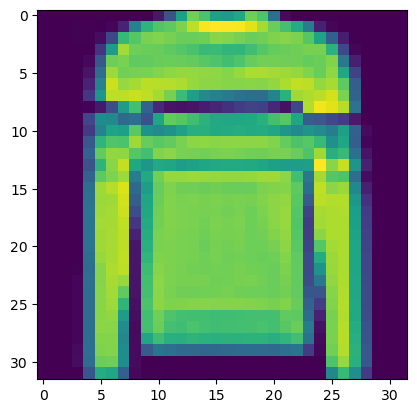

In [15]:
plt.imshow(orig)

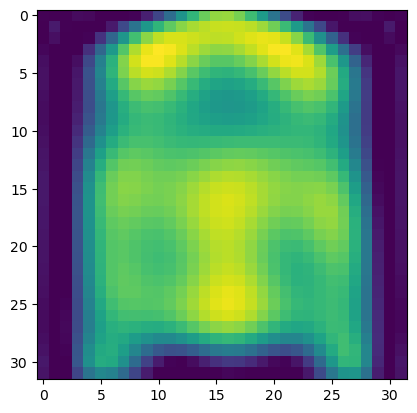

In [16]:
plt.imshow(recIM)

In [17]:
# PSNR of direct backward reconstruction of coefficients without perturbation 
orig_normal = Normalize()(orig)
recIM_norm = Normalize()(recIM)
psnr(orig_normal, recIM_norm, data_range=1.)

15.644782430083758

In [18]:
# MSE of direct reconstruction

np.mean(((orig_normal - np.array(recIM_norm))**2)*0.5)

0.013629872

In [19]:
prozs = [0.01, 0.2, 0.5, 0.7] 

In [20]:
orig = np.array(orig)

In [21]:
rand_perturb = []

testRK_pert = np.array(testRK)
testRK_pert = testRK_pert.reshape(1,testRK_pert.shape[0])
for proz in prozs:
    
    rand_perturb.append(np.random.rand(1,testRK_pert.shape[1])*(np.max(testRK_pert)-np.min(testRK_pert))*proz)

In [22]:
rand_perturb[0].shape

(1, 100)

In [23]:
orig_perturb = []
for rand_transform in rand_perturb:
    orig_perturb.append(torch.from_numpy(np.add(testRK_pert,rand_transform)).reshape(rand_transform.shape))#.to(device))
    #rec_perturb.append(model(orig_perturb[-1].float()))

In [24]:
# reconstruction from 10% perturbed
#testRK = get_all_thetas(orig)
#testRK = testRK.float()
pert_coeff = torch.tensor(orig_perturb[0]).float()
recIM_pert10 = torch.matmul(X_p.float(), pert_coeff.T).T
recIM_pert10[np.where(recIM_pert10 < 0.0)] = 0
recIM_pert10 = recIM_pert10.reshape(32,32)

/tmp/ipykernel_25739/805019647.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pert_coeff = torch.tensor(orig_perturb[0]).float()


In [25]:
testRK_pert.shape

(1, 100)

In [26]:
#MSE of coefficient perturbnbation
np.mean(((testRK_pert - np.array(pert_coeff))**2)*0.5)

5.6892445e-06

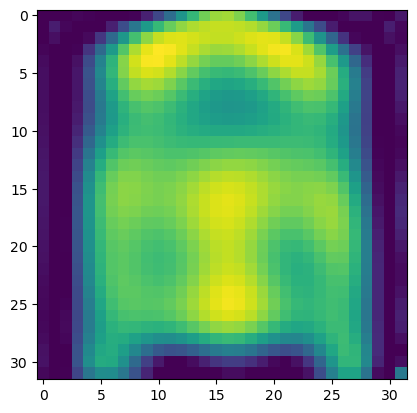

In [27]:
plt.imshow(recIM_pert10)

In [28]:
orig_normal.shape

(32, 32)

In [29]:
# PSNR of direct backward reconstruction of coefficients without perturbation 
orig_normal = Normalize()(orig)
recIM_pert10_norm = Normalize()(recIM_pert10)
psnr(orig_normal, recIM_pert10_norm, data_range=1.)

15.539453865144765

In [30]:
#what is MSE of initial and final images

np.mean(((orig_normal - recIM_pert10_norm)**2)*0.5)

0.013964476